Decision Tree Model Accuracy: 0.8007313899926157


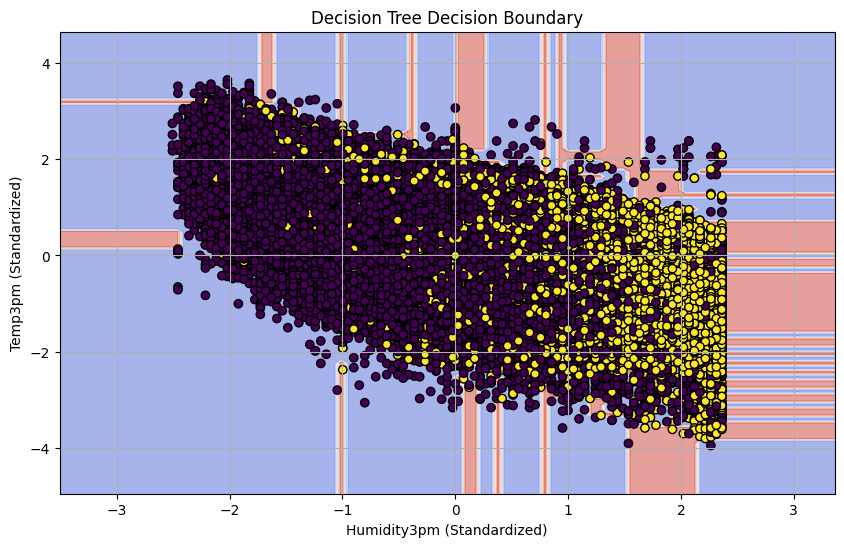

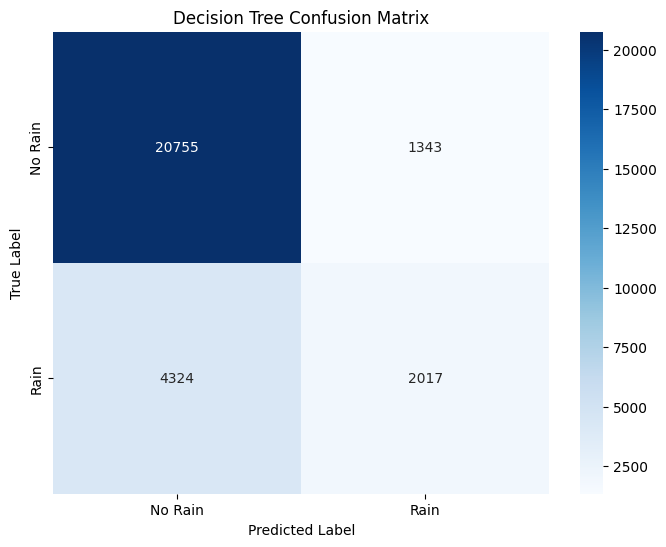

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score # Import the accuracy_score function
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load the data
weather_data = pd.read_csv('/content/archive (1)vamshi.zip')

# Drop rows with missing target values
weather_data = weather_data.dropna(subset=['RainTomorrow'])

# Encode categorical columns
label_enc = LabelEncoder()
for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']:
    weather_data[col] = label_enc.fit_transform(weather_data[col].astype(str))

# Impute missing values for numerical columns
numerical_columns = weather_data.select_dtypes(include=['float64']).columns
weather_data[numerical_columns] = weather_data[numerical_columns].fillna(weather_data[numerical_columns].mean())

# Select two features for visualization
X = weather_data[['Humidity3pm', 'Temp3pm']]
y = weather_data['RainTomorrow']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train DT
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.title(title)
    plt.xlabel('Humidity3pm (Standardized)')
    plt.ylabel('Temp3pm (Standardized)')
    plt.grid()
    plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Rain', 'Rain'], yticklabels=['No Rain', 'Rain'])
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
dt_accuracy = accuracy_score(y_test, dt_preds)
print("Decision Tree Model Accuracy:", dt_accuracy)
dt_preds = decision_tree.predict(X_test)

# Plot decision boundary
plot_decision_boundary(decision_tree, X_scaled, y, 'Decision Tree Decision Boundary')

# Plot confusion matrix
plot_confusion_matrix(y_test, dt_preds, 'Decision Tree Confusion Matrix')
